# Cálculo de histograma

## 1. Cálculo do histograma de um sinal 1D

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Calcularemos o histograma do seguinte sinal 1D:
signal = [0, 10, 12, 12, 33, 0, 34, 52, 50, 70]
num_bins = 5

bin_size = (max(signal)-min(signal))/num_bins
hist = np.zeros(num_bins, dtype=int)
for value in signal:
    bin_index = int(value/bin_size)
    if bin_index==num_bins:
        bin_index -= 1
    hist[bin_index] += 1
    
# Cálculo do intervalo de cada caixa do histograma
bins_values = []
for i in range(num_bins+1):
    bins_values.append(i*bin_size)
print('Size of each bin: %f'%bin_size)
print('Bin values: %s'%bins_values)
print('Histogram:')
print(hist)

Size of each bin: 14.000000
Bin values: [0.0, 14.0, 28.0, 42.0, 56.0, 70.0]
Histogram:
[5 0 2 2 1]


<BarContainer object of 5 artists>

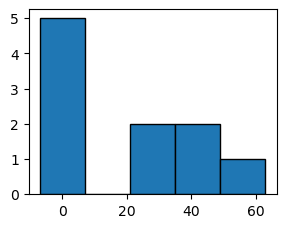

In [2]:
plt.bar(bins_values[:-1], hist, bin_size, edgecolor='k')

In [3]:
# Cálculo do histograma utilizando a biblioteca numpy
hist, bins = np.histogram(signal, num_bins)
print('bins: %s'%bins)
print('hist: %s'%hist)

bins: [ 0. 14. 28. 42. 56. 70.]
hist: [5 0 2 2 1]


(array([5., 0., 2., 2., 1.]),
 array([ 0., 14., 28., 42., 56., 70.]),
 <BarContainer object of 5 artists>)

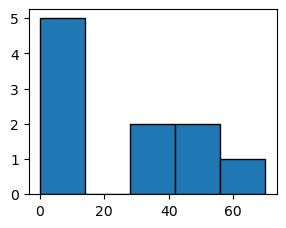

In [4]:
# Cálculo do histograma e plotagem utilizando a biblioteca matplotlib
plt.hist(signal, num_bins, edgecolor='k')

## 2. Cálculo do histograma de uma imagem

<BarContainer object of 50 artists>

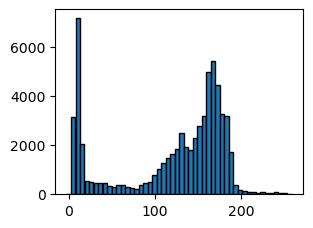

In [5]:
# Leitura da imagem
img = plt.imread('cameraman.tiff')

num_bins = 50             # Número de caixas no histograma
bin_size = 256/num_bins   # Tamanho de cada caixa

hist = np.zeros(num_bins)
num_rows, num_cols = img.shape
for row in range(num_rows):
    for col in range(num_cols):
        bin_index = int(img[row, col]/bin_size)
        hist[bin_index] += 1
        
# Cálculo do intervalo de cada caixa, utilizando a função linspace do numpy      
bins_values = np.linspace(0, 256, num_bins)     
plt.bar(bins_values, hist, bin_size, edgecolor='k')

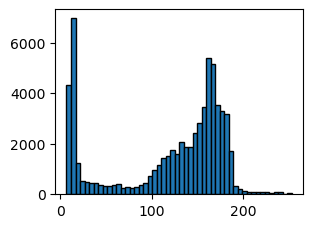

In [6]:
# Histograma utilizando o matplotlib
plt.hist(img.flatten(), num_bins, edgecolor='k');

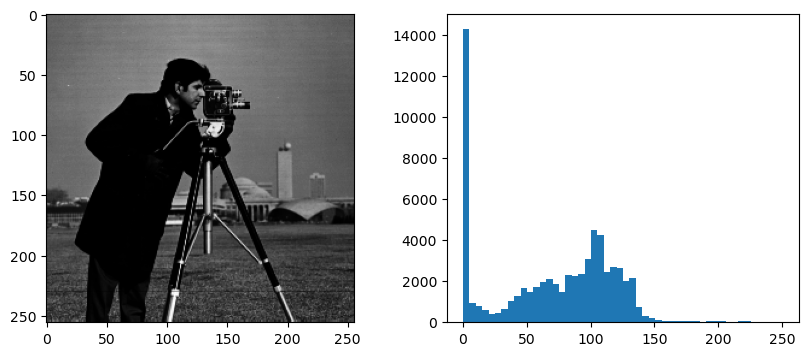

In [11]:
# Aplica transformação (correção gamma) para tornar a imagem mais escura, 
# e recalcula o histograma
gamma = 2.
c = 255/255**gamma
img_transf = (c*img**gamma).astype(np.uint8)
plt.figure(figsize=[10, 4])
plt.subplot(1, 2, 1)
plt.imshow(img_transf, 'gray')
plt.subplot(1, 2, 2)
plt.hist(img_transf.flatten(), 50);